In [9]:
import wrds

In [10]:
db = wrds.Connection()
db.list_libraries() 
db.list_tables(library='frb')

WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


['fx_daily', 'fx_monthly', 'rates_daily', 'rates_monthly']

In [11]:
db.describe_table(library='frb',table='fx_daily').head(5)

Approximately 14115 rows in frb.fx_daily.


,name,nullable,type,comment
0,date,True,DATE,date
1,dexusal,True,DOUBLE PRECISION,Exchange Rate for Australia (US$/Australian$)
2,dexalus,True,DOUBLE PRECISION,Exchange Rate for Australia (Australian$/US$)
3,dexbzus,True,DOUBLE PRECISION,Exchange Rate for Brazil (Real/US$)
4,dexcaus,True,DOUBLE PRECISION,Exchange Rate for Canada (C$/US$)


In [12]:
columns = db.get_table(library='frb', table='fx_daily').columns
print(columns)

Index(['date', 'dexusal', 'dexalus', 'dexbzus', 'dexcaus', 'dexchus',
       'dexdnus', 'dexhkus', 'dexinus', 'dexjpus', 'dexkous', 'dexmaus',
       'dexmxus', 'dexusnz', 'dexnzus', 'dexnous', 'dexsius', 'dexsfus',
       'dexslus', 'dexsdus', 'dexszus', 'dextaus', 'dexthus', 'dexusuk',
       'dexukus', 'dexvzus', 'exauus', 'exbeus', 'exfnus', 'exfrus', 'exgeus',
       'exgrus', 'exusir', 'exirus', 'exitus', 'exneus', 'expous', 'exspus',
       'exusec', 'execus', 'dexuseu', 'dexeuus', 'dtwexb', 'dtwexbgs',
       'dtwexm', 'dtwexafegs', 'dtwexo', 'dtwexemegs', 'indexgx'],
      dtype='object')


In [19]:
fx = db.raw_sql("""
    SELECT date, dexuseu, dexusuk, dexjpus
    FROM frb.fx_daily
    WHERE date >= '2020-01-01'
    ORDER BY date
""")

# Rename columns for clarity
fx = fx.rename(columns={
    'dexuseu': 'EURUSD',   # USD per Euro
    'dexusuk': 'GBPUSD',   # USD per British Pound
    'dexjpus': 'USDJPY'    # Yen per USD
})

fx.set_index('date', inplace=True)


In [21]:
fx.head(5)

,EURUSD,GBPUSD,USDJPY
date,,,
2020-01-01,<NA>,<NA>,<NA>
2020-01-02,1.1166,1.3128,108.43
2020-01-03,1.1173,1.3091,107.94
2020-01-06,1.1187,1.3163,108.36
2020-01-07,1.1138,1.3127,108.53


In [22]:
# Check for NaN and missing values
print("=" * 60)
print("MISSING VALUES CHECK")
print("=" * 60)
print(f"\nTotal missing values per column:")
print(fx.isna().sum())
print(f"\nPercentage of missing values per column:")
print((fx.isna().sum() / len(fx) * 100).round(2))
print(f"\nTotal rows with at least one missing value: {fx.isna().any(axis=1).sum()}")
print(f"Total rows with all missing values: {fx.isna().all(axis=1).sum()}")

# Show rows with missing values
missing_rows = fx[fx.isna().any(axis=1)]
if len(missing_rows) > 0:
    print(f"\nRows with missing values (showing first 10):")
    print(missing_rows.head(10))
else:
    print("\n✓ No missing values found!")


MISSING VALUES CHECK

Total missing values per column:
EURUSD    58
GBPUSD    58
USDJPY    58
dtype: int64

Percentage of missing values per column:
EURUSD    4.35
GBPUSD    4.35
USDJPY    4.35
dtype: float64

Total rows with at least one missing value: 58
Total rows with all missing values: 58

Rows with missing values (showing first 10):
            EURUSD  GBPUSD  USDJPY
date                              
2020-01-01    <NA>    <NA>    <NA>
2020-01-20    <NA>    <NA>    <NA>
2020-02-17    <NA>    <NA>    <NA>
2020-05-25    <NA>    <NA>    <NA>
2020-07-03    <NA>    <NA>    <NA>
2020-09-07    <NA>    <NA>    <NA>
2020-10-12    <NA>    <NA>    <NA>
2020-11-11    <NA>    <NA>    <NA>
2020-11-26    <NA>    <NA>    <NA>
2020-11-27    <NA>    <NA>    <NA>


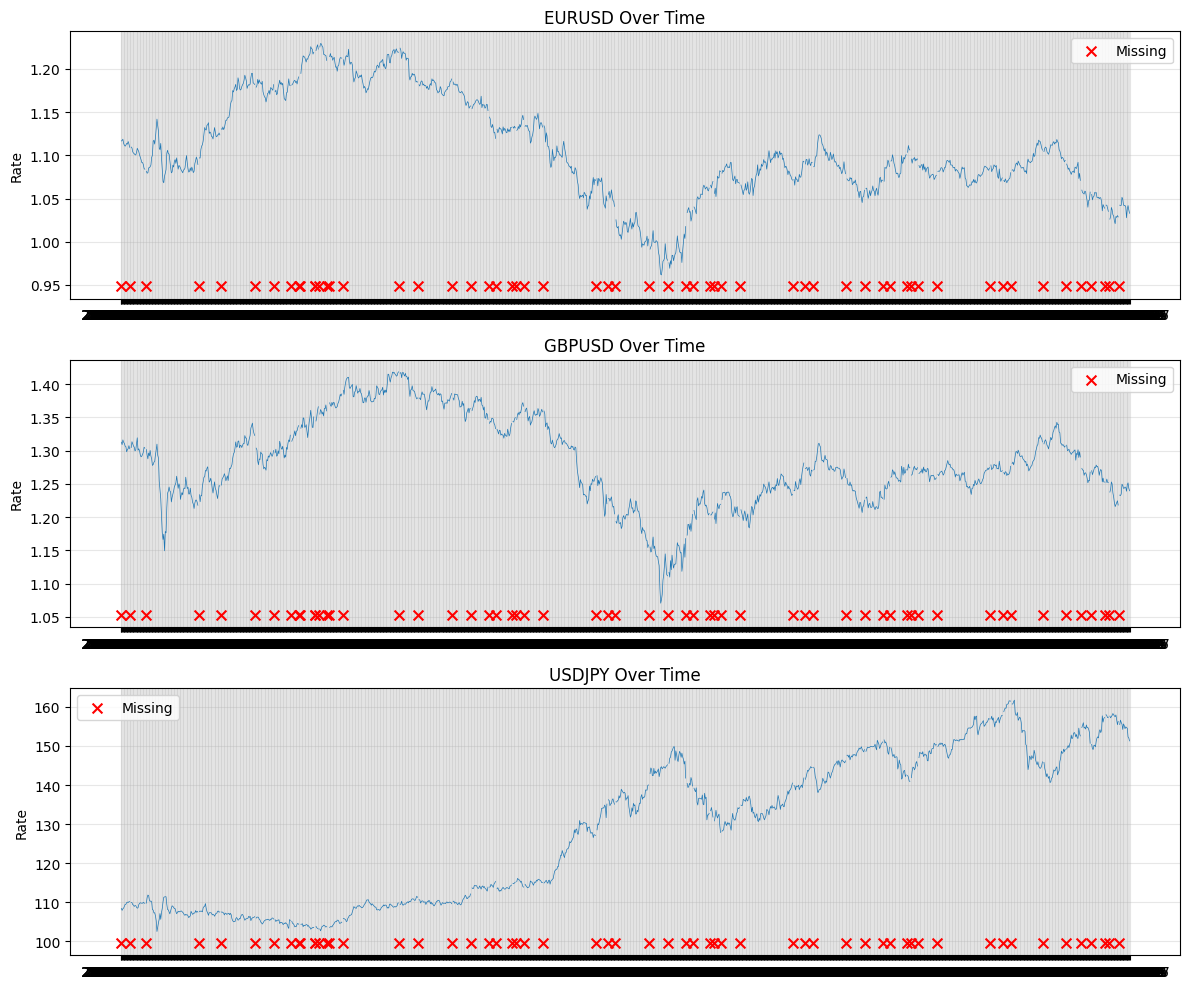

In [ ]:
# Fill missing values with forward fill (last known value)
fx = fx.ffill()

